In [1]:
zh_word_set = set(['青蛙', '树蛙', '蟾蜍', '蜥蜴'])
en_word_set = set(['frog', 'treefrog', 'toad', 'lizard'])

In [2]:
import numpy as np

In [3]:
# 加载中文词语向量
zh_word_vec_dict = dict()
with open('../data/cc.zh.300.vec') as infile:
    for line in infile:
        values = line.split()
        word = values[0]
        coefficients = np.asarray(values[1:], dtype='float32')
        if word in zh_word_set:
            zh_word_vec_dict[word] = coefficients
print(zh_word_vec_dict.keys())

dict_keys(['青蛙', '蜥蜴', '蟾蜍', '树蛙'])


In [4]:
# 加载英文词向量
en_word_vec_dict = dict()
with open('../data/cc.en.300.vec') as infile:
    for line in infile:
        values = line.split()
        word = values[0]
        coefficients = np.asarray(values[1:], dtype='float32')
        if word in en_word_set:
            en_word_vec_dict[word] = coefficients
print(en_word_vec_dict.keys())    

dict_keys(['frog', 'lizard', 'toad', 'treefrog'])


In [5]:
# 构建中文词向量矩阵
zh_word_matrix = np.zeros((len(zh_word_vec_dict), 300))
i = 0
for word, vector in zh_word_vec_dict.items():
    zh_word_matrix[i] = vector
    i += 1
print(zh_word_matrix.shape)

(4, 300)


In [6]:
# 构建英文词向量矩阵
en_word_matrix = np.zeros((len(en_word_vec_dict), 300))
i = 0
for word, vector in en_word_vec_dict.items():
    en_word_matrix[i] = vector
    i += 1
print(en_word_matrix.shape)

(4, 300)


In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [8]:
zh_r = pca.fit(zh_word_matrix).transform(zh_word_matrix)
print(zh_r.shape)
en_r = pca.fit(en_word_matrix).transform(en_word_matrix)
print(en_r.shape)

(4, 2)
(4, 2)


In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

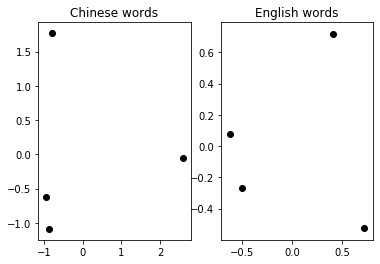

In [10]:
plt.figure()
plt.subplot(1, 2, 1)
plt.title('Chinese words')
plt.scatter(zh_r[:, 0], zh_r[:, 1], color='black')
plt.subplot(1, 2, 2)
plt.title('English words')
plt.scatter(en_r[:, 0], en_r[:, 1], color='black')
plt.show()